Accuracy: 96.67 %


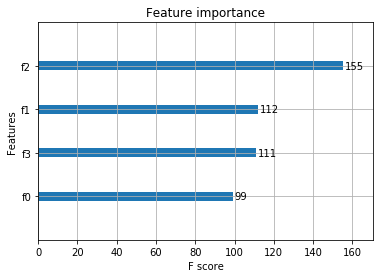

In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pdb
%matplotlib inline

# read from the dataset in sklearn.datasets
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# print(X_train)
# print(y_train)
# pdb.set_trace()

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',  # 多分类的问题
    'num_class': 3,               # 类别数，与 multisoftmax 并用
    'gamma': 0.1,                  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 6,               # 构建树的深度，越大越容易过拟合
    'lambda': 2,                   # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'subsample': 0.7,              # 随机采样训练样本
    'colsample_bytree': 0.7,       # 生成树时进行的列采样
    'min_child_weight': 3,
    'silent': 1,                   # 设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.1,                  # 如同学习率
    'seed': 1000,
    'nthread': 4,                  # cpu 线程数
}

plst = params.items()

dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

# 计算准确率
cnt1 = 0 
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print('Accuracy: %.2f %%' %(100*cnt1 / (cnt1+cnt2)))

# 显示重要特征
plot_importance(model)
plt.show()

In [3]:
model.save_model('test.model')

In [6]:
# dump model to txt file with feature map
model.dump_model('dump.raw.txt')